# Heatmaps - Task PCA

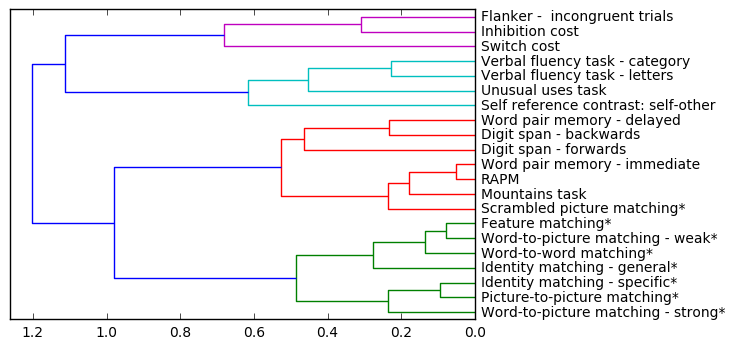

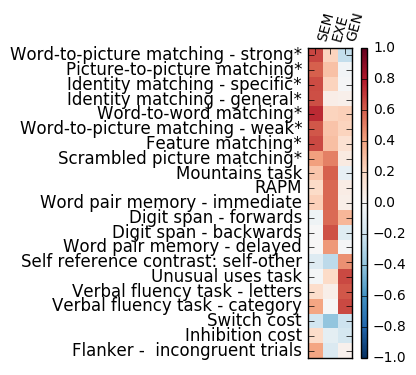

In [511]:
import pandas as pd
df = pd.read_csv('data/PCA_Task.csv', header=0, index_col=0)
df.columns = ['SEM', 'EXE', 'GEN']

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

from hierHeatmap import *
df = hier_clust(df)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(df, vmin=-1, vmax=1, interpolation='nearest', cmap=plt.cm.RdBu_r, aspect='equal')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "15%", pad="20%")
plt.colorbar(im, cax=cax)
ax.set_yticks(range(df.shape[0]))
ax.set_xticks(range(df.shape[1]))
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(list(df.columns), rotation='75', ha='left')
ax.set_yticklabels(list(df.index), size='large')
plt.savefig('Results/Fig2a_PC_tasks.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

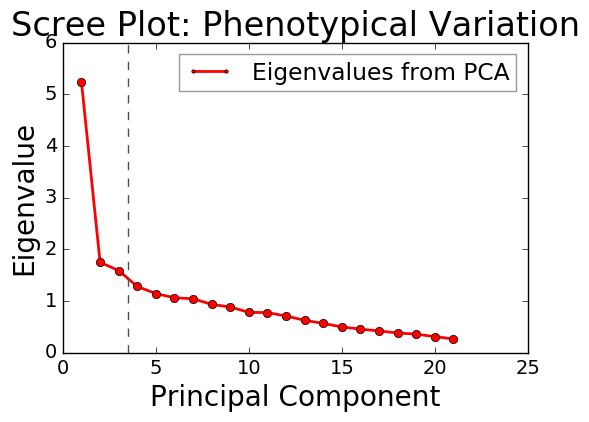

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# Make a random array and then make it positive-definite
eigvals = pd.read_csv('data/PCA_Task_eigen.csv', header=0, index_col=0).values

fig = plt.figure()
sing_vals = np.arange(len(eigvals)) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.plot([3.5, 3.5], [0, 6], ls='--', c='.3')
plt.title('Scree Plot: Phenotypical Variation', size='xx-large')
plt.xlabel('Principal Component', size='x-large')
plt.ylabel('Eigenvalue', size='x-large')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='large'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)

plt.savefig('Results/Fig2a_PC_Eigen.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

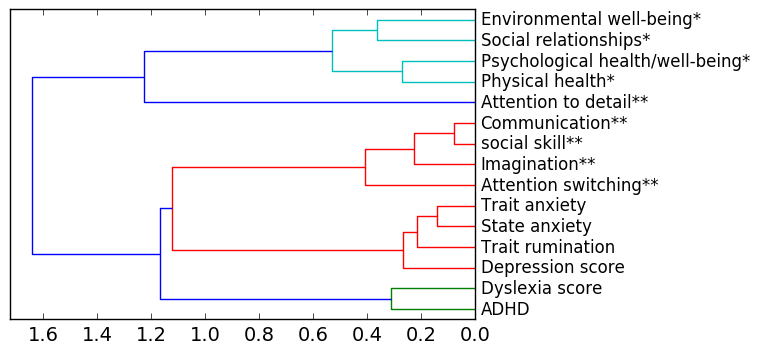

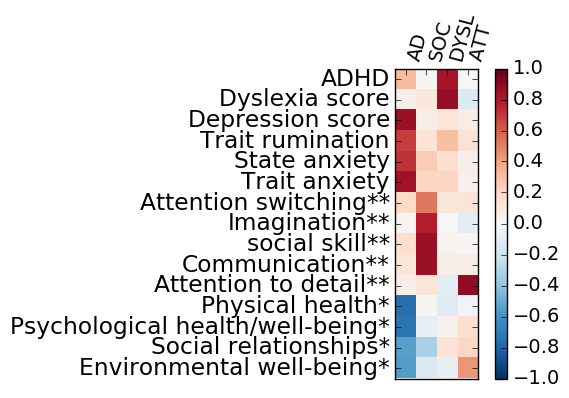

In [6]:
import pandas as pd
df = pd.read_csv('./data/PCA_QD.csv', header=0, index_col=0)
df.columns = ['AD', 'SOC', 'DYSL', 'ATT']
import numpy as np
import matplotlib.pyplot as plt
from hierHeatmap import * 

df = hier_clust(df)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(df, vmin=-1, vmax=1, interpolation='nearest', cmap=plt.cm.RdBu_r, aspect='equal')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "15%", pad="20%")
plt.colorbar(im, cax=cax)
ax.set_yticks(range(df.shape[0]))
ax.set_xticks(range(df.shape[1]))
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(list(df.columns), rotation='75', ha='left')
ax.set_yticklabels(list(df.index), size='large')
plt.savefig('Results/Fig2b_PC_QD.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

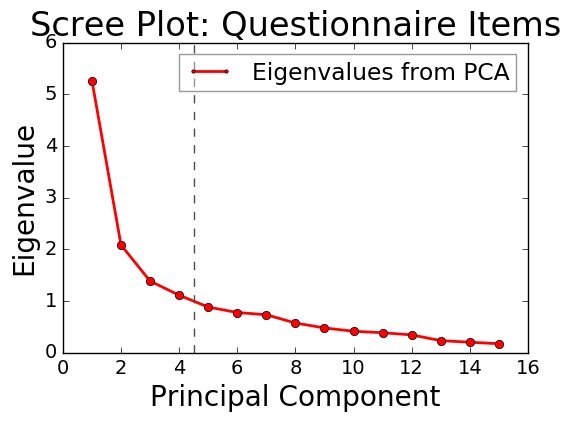

In [21]:
# Make a random array and then make it positive-definite
eigvals = pd.read_csv('data/PCA_QD_eigen.csv', header=0, index_col=0).values

fig = plt.figure()
sing_vals = np.arange(len(eigvals)) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.plot([4.5, 4.5], [0, 6], ls='--', c='.3')
plt.title('Scree Plot: Questionnaire Items', size='xx-large')
plt.xlabel('Principal Component', size='x-large')
plt.ylabel('Eigenvalue', size='x-large')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='large'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.savefig('Results/Fig2b_PC_Eigen.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

# CCA heat maps

In [1]:
import glob, os
path = glob.glob('.\Results\DMN_16_REVISION\*.npy')
print path

['.\\Results\\DMN_16_REVISION\\SCCAloading_all.npy', '.\\Results\\DMN_16_REVISION\\SCCAloading_BOOTS.npy', '.\\Results\\DMN_16_REVISION\\SCCAloading_BOOTS_FD.npy', '.\\Results\\DMN_16_REVISION\\SCCAloading_LOSO.npy']


In [2]:
import numpy as np
from os.path import expanduser

region_labels_fn = 'data/data_cross_corr_Bzdok_DMN16_preprocessed_ROIS.npy'
beh_keysfn = 'data/data_MWQ_keys.npy'
keys = np.load(expanduser(beh_keysfn))[1:]
MWQ_keys = np.append(keys, keys)

y_loadings_1 = np.stack((-np.load(path[0])[1][:,0], np.load(path[-1])[1][:,5], np.load(path[1])[1][:,2]),axis=1)
y_loadings_2 = np.stack((np.load(path[0])[1][:,3], np.load(path[-1])[1][:,1], -np.load(path[1])[1][:,3]),axis=1)


x_loadings_1 = np.stack((-np.load(path[0])[0][:,0], np.load(path[-1])[0][:,5], np.load(path[1])[0][:,2]),axis=1)
x_loadings_2 = np.stack((np.load(path[0])[0][:,3], np.load(path[-1])[0][:,1], -np.load(path[1])[0][:,3]),axis=1)


# Transform the flatten weights for network strength back to matrices for visualisation
idx = np.triu_indices(16, 1)

corr_mat_1 = np.zeros((16, 16, 3))
for i in range(3):
    this_mat = np.zeros((16, 16))
    this_mat[idx] = x_loadings_1[:, i]
    corr_mat_1[..., i] = this_mat + this_mat.T
    
corr_mat_2 = np.zeros((16, 16, 3))
for i in range(3):
    this_mat = np.zeros((16, 16))
    this_mat[idx] = x_loadings_2[:, i]
    corr_mat_2[..., i] = this_mat + this_mat.T

corr_mat_1_flat = np.hstack((corr_mat_1[..., 0], corr_mat_1[..., 1], corr_mat_1[..., 2]))
corr_mat_2_flat = np.hstack((corr_mat_2[..., 0], corr_mat_2[..., 1], corr_mat_2[..., 2]))

x_loadings = np.vstack((corr_mat_1_flat, corr_mat_2_flat))
y_loadings = np.vstack((y_loadings_1, y_loadings_2))


In [3]:
print '   LODO     BOOTS'
print y_loadings_1[:, 1:]

   LODO     BOOTS
[[ 0.          0.        ]
 [ 0.55109738  0.01489675]
 [ 0.          0.19401403]
 [ 0.         -0.        ]
 [ 0.          0.00237442]
 [ 0.54929202  0.88339426]
 [-0.         -0.00336249]
 [ 0.          0.        ]
 [ 0.07925859  0.17745058]
 [ 0.62312762  0.35815827]
 [-0.          0.02264774]
 [ 0.          0.14647632]
 [-0.          0.        ]]


In [7]:
n_components = 2
n_connects = 120
n_areas = 16
# slide 2: SCCA summary plots
RS_keys = ['1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '1', '2', '3', '4', '5', '6']

from numpy.ma import masked_array
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


mask_brain = np.hstack((np.ones((32,32)), np.zeros((32,16))))
mask_brain_rev = np.array(mask_brain == 0, dtype=np.int)

mask_thoughts = np.hstack((np.ones((26,2)),np.zeros((26,1))))
mask_thoughts_rev = np.array(mask_thoughts == 0, dtype=np.int)

def RSC_plot(mat, ax):
    mat_b = masked_array(mat,  mask=mask_brain)
    mat_a = masked_array(mat,  mask=mask_brain_rev)
    im_a = ax.matshow(mat_a, vmin=-0.9, vmax=0.9, cmap=plt.cm.RdBu_r)
    im_b = ax.matshow(mat_b, vmin=0, vmax=1, cmap=plt.cm.Greys)

    ax.locator_params(nbins=3)
    ax.set_xticks(np.arange(n_areas*3))
    ax.set_xticklabels(RS_keys * 3, fontsize='large')
    ax.set_yticks(np.arange(n_areas*2))
    ax.set_yticklabels(RS_keys * 2, fontsize='large')

    ax.plot([-0.5, 31.5], [-0.5, 31.5], ls='--', c='.3') 
    ax.plot([15.5,47.5], [-0.5,31.5], ls='--', c='.3') 
    ax.plot([-0.5,15.5], [15.5,31.5], ls='--', c='.3')
    ax.plot([31.5, 47.5], [-0.5,15.5], ls='--', c='.3')

    ax.vlines(15.5, -0.5, 31.5) 
    ax.vlines(31.5, -0.5, 31.5) 
    ax.hlines(15.5, -0.5, 47.5) 
    

def MWQ_plot(mat, ax):
    mat_b = masked_array(mat,  mask=mask_thoughts)
    mat_a = masked_array(mat,  mask=mask_thoughts_rev)
    im_a = ax.matshow(mat_a, vmin=-0.9, vmax=0.9, cmap=plt.cm.RdBu_r)
    im_b = ax.matshow(mat_b, vmin=0, vmax=1, cmap=plt.cm.Greys)
    
    ax.locator_params(nbins=3)
    ax.set_yticks(np.arange(len(MWQ_keys)))
    ax.set_yticklabels(MWQ_keys, fontsize='x-large')
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(['LODO', 'BOOTS', 'Common', ], rotation=90, fontsize='large')
    
    ax.vlines(1.5, -0.5, 25.5) 
    ax.vlines(0.5, -0.5, 25.5) 

    ax.hlines(12.5, -0.5, 2.5) 

    divider = make_axes_locatable(plt.gca())
    
    cax_a = divider.append_axes("right", "20%", pad="20%")
    cb_a = plt.colorbar(im_a, cax=cax_a)
    cb_a.set_label('Canonical weights')
    

    #     plt.tight_layout()

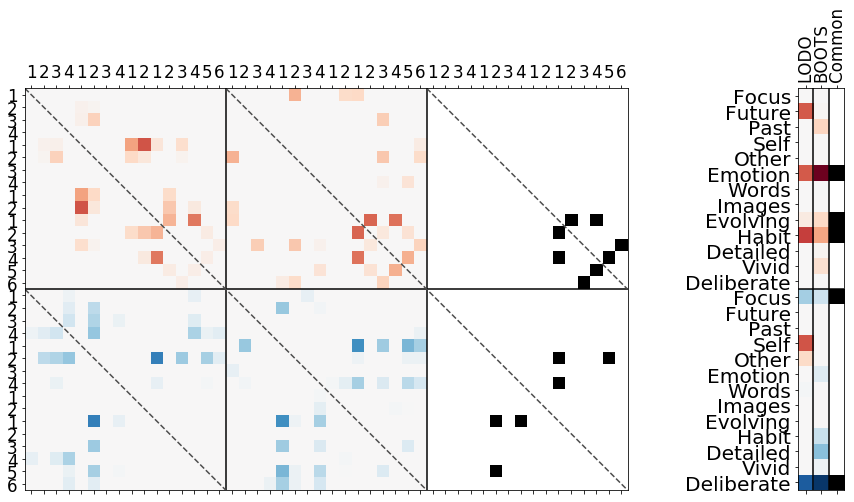

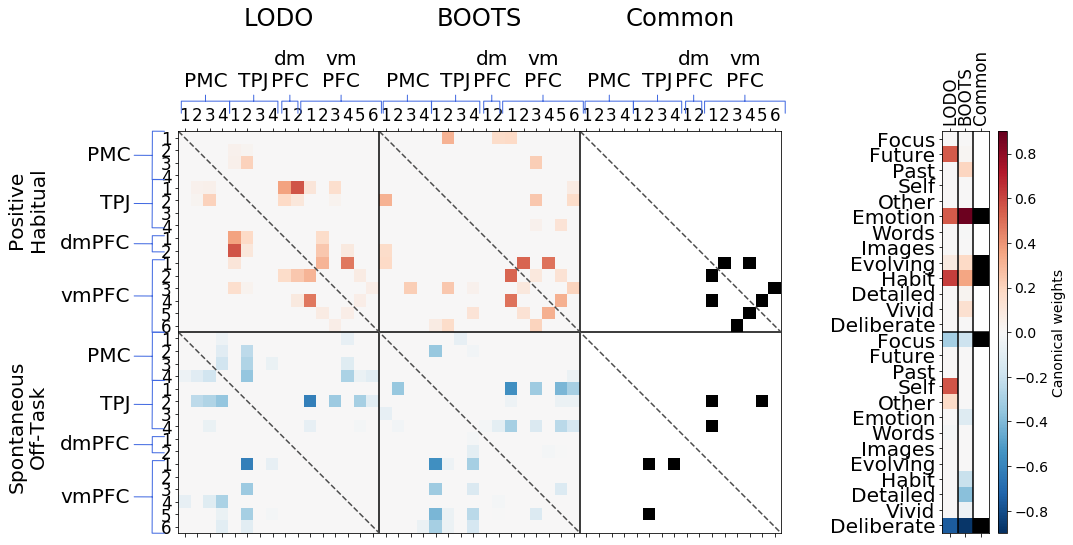

In [8]:


matplotlib.rcParams.update({'font.size': 14})


multi_com1 = np.sqrt(corr_mat_1_flat[:, 16 : 32] * corr_mat_1_flat[:, 32:])
multi_com2 = np.sqrt(corr_mat_2_flat[:, 16 : 32] * corr_mat_2_flat[:, 32:])
bin_comp1 = np.array(multi_com1 > 0.1, dtype=np.int)
bin_comp2 = np.array(multi_com2 > 0.1, dtype=np.int)
bin_comp_brain = np.vstack((bin_comp1, bin_comp2))


multi_com1 = np.sqrt(y_loadings_1[:, 1] * y_loadings_1[:, 2])
multi_com2 = np.sqrt(y_loadings_2[:, 1] * y_loadings_2[:, 2])
bin_comp1 = np.array(multi_com1 > 0.1, dtype=np.int)
bin_comp2 = np.array(multi_com2 > 0.1, dtype=np.int)
bin_comp_thought = np.hstack((bin_comp1, bin_comp2))
 

brain_mat = np.hstack((x_loadings[:, 16:], bin_comp_brain))
behav_arr = np.hstack((y_loadings[:, 1:], bin_comp_thought.reshape((26,1))))


fig = plt.figure(figsize=(17,10))
ax1 = plt.subplot2grid((4,4), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4,4), (0, 3), colspan=1, rowspan=3)

RSC_plot(brain_mat, ax1)
MWQ_plot(behav_arr, ax2)
for i in range(3):
    
    ax1.annotate('PMC', xy=(0.045 + i*.335, 1.07), xytext=(0.045 + i*.335, 1.1), xycoords='axes fraction', 
                fontsize='x-large', ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('TPJ', xy=(0.125 + i*.335, 1.07), xytext=(0.125 + i*.335, 1.1), xycoords='axes fraction', 
                fontsize='x-large', ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('dm\nPFC', xy=(0.185 + i*.335, 1.07), xytext=(0.185 + i*.335, 1.1), xycoords='axes fraction', 
                fontsize='x-large', ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=.4, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('vm\nPFC', xy=(0.27 + i*.335, 1.07), xytext=(0.27 + i*.335, 1.1), xycoords='axes fraction', 
                fontsize='x-large', ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=0.6', lw=1.0, color='royalblue'))
for i in range(2):    
    ax1.annotate('PMC', xy=(-0.04, 0.94 - i*.5), xytext=(-0.08, 0.917 - i*.5), xycoords='axes fraction', 
                fontsize='x-large', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('TPJ', xy=(-0.04, 0.82 - i*.5), xytext=(-0.08, 0.797 - i*.5), xycoords='axes fraction', 
                fontsize='x-large', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('dmPFC', xy=(-0.04, 0.72 - i*.5), xytext=(-0.08, 0.697 - i*.5), xycoords='axes fraction', 
                fontsize='x-large', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=.4, lengthB=0.6', lw=1.0, color='royalblue'))
    ax1.annotate('vmPFC', xy=(-0.04, 0.59 - i*.5), xytext=(-0.08, 0.567 - i*.5), xycoords='axes fraction', 
                fontsize='x-large', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=0.6', lw=1.0, color='royalblue'))
    compNames = ['Positive\nHabitual', 'Spontaneous\nOff-Task']
    ax1.annotate(compNames[i], xy=(-0.25, (0.7 - i*0.6)), xytext=(-0.25, (0.7 - i*0.6)), xycoords='axes fraction', 
                fontsize='x-large', ha='center', va='bottom', rotation=90)

for i, lab in enumerate(['LODO', 'BOOTS', 'Common', ]):
    ax1.annotate(lab, xy=((0.5 + i)/3, 1.25), xytext=((0.5 + i)/3, 1.25), xycoords='axes fraction',
                fontsize='xx-large', ha='center', va='bottom')
    
# plt.tight_layout()
plt.savefig('Results/Fig3c_SCCA_components_.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [379]:
# save for brainview
np.savetxt('comp1_brain.txt', corr_mat_1[..., 2], delimiter='\t', fmt='%10.5f')
np.savetxt('comp2_brain.txt', corr_mat_2[..., 2], delimiter='\t', fmt='%10.5f')

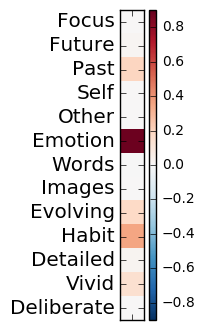

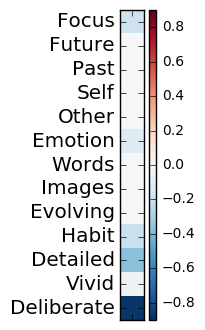

In [393]:
# thought probe

for i in range(2):
    behav_arr = np.zeros((13, 1))
    behav_arr.flat = y_loadings[0 + 13 * i : 13 * (i +1) , -1]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.matshow(behav_arr, vmin=-0.9, vmax=0.9, interpolation='nearest', cmap=plt.cm.RdBu_r, aspect='equal')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "30%", pad="20%")
    plt.colorbar(im, cax=cax)

    ax.set_yticks(np.arange(len(keys)))
    ax.set_yticklabels(keys, fontsize='x-large')
    ax.set_xticks(np.arange(1))
    ax.set_xticklabels('')

    plt.savefig('Results/CCA_thought_%i.png' %(i+1), dpi=300, transparent=True, bbox_inches='tight')
    plt.show()


# The following cells are for revisons, needs cleaning

In [4]:
region_labels_fn = 'data/data_cross_corr_Bzdok_DMN16_preprocessed_ROIS.npy'
behavefn = 'data/data_MWQ_session_preprocessed.npy'
rscorrfn = 'data/data_cross_corr_Bzdok_DMN16_preprocessed.npy'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from os.path import expanduser

matplotlib.rcParams.update({'font.size': 14})

subject_subset = np.load(expanduser(behavefn))[:, 0].astype('i4') - 1
rest_data = np.load(expanduser(rscorrfn))
X = rest_data[subject_subset,:]

mean_NetworkStrength = np.mean(X, axis=0)
n_areas= 16
idx = np.triu_indices(n_areas, 1)
corr_mat = np.zeros((n_areas, n_areas))
corr_mat[idx] = mean_NetworkStrength
corr_mat = corr_mat + corr_mat.T

region_labels = np.load(region_labels_fn)

plt.matshow(corr_mat, vmin=-0.7, vmax=0.7, cmap=plt.cm.RdBu_r)
plt.plot([-0.5, n_areas-0.5], [-0.5, n_areas-0.5], ls='--', c='.3')
plt.xticks(range(16), region_labels, rotation=90)
plt.yticks(range(16), region_labels)
plt.colorbar()

plt.savefig('./Results/RemoveHighFD/average_NS.png', bbox_inches='tight', dpi=150)

In [8]:
import pandas as pd

In [69]:
master_df = pd.read_csv('./data/revision2.csv', na_values=' ')

In [70]:
all_labels = list(master_df.columns)
all_values = np.float64(np.array(master_df.values.tolist()))
var_corr_mat = np.corrcoef(all_values.T)

In [71]:
matplotlib.rcParams.update({'font.size': 14})
plt.matshow(var_corr_mat, vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)
# plt.plot([-0.5, n_areas-0.5], [-0.5, n_areas-0.5], ls='--', c='.3')
plt.xticks(range(var_corr_mat.shape[0]), all_labels, rotation=90)
plt.yticks(range(var_corr_mat.shape[1]), all_labels)
plt.colorbar()
plt.savefig('./Results/RemoveHighFD/wth_2.png', bbox_inches='tight', dpi=150)